In [19]:
import numpy as np
import pandas as pd
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [20]:
df = pd.read_pickle('../../data/processed/merged/state0_new_df.pkl')
print(df.shape)

(45993, 15)


In [21]:
df = df[(df['eventType'] == 4) & (df['is_ios'] == 1)]

df = df.drop(columns=['is_ios', 'eventType', 'eventSampleSpeed', 'eventGPSSignalStrength', 'eventSensorDetectionMthd', 'source_file', 'gpsP75LateralAccel', 'gpsP95LateralAccel'])
df = df.dropna(subset=['bearingAngleChange'])
corr_matrix = df.corr()

In [22]:
df.columns

Index(['eventDurationSeconds', 'eventStartSpeed', 'eventEndSpeed',
       'gpsMedianLateralAccel', 'bearing_angular_change_per_second',
       'bearingAngleChange', 'gps_radius'],
      dtype='object')

In [23]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(df)

In [24]:
clusterer = hdbscan.HDBSCAN()

In [25]:
clusterer.fit(df)

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,min_cluster_size,5
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


In [26]:
clusterer.labels_

array([54, 54, 54, ..., 54, 54, -1], shape=(21629,))

In [27]:
clusterer.labels_.max()

np.int64(55)

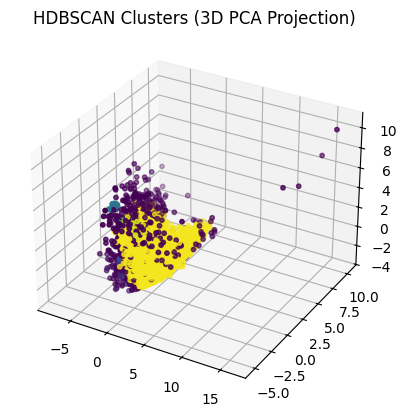

In [28]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusterer.labels_, s=10)
plt.title("HDBSCAN Clusters (3D PCA Projection)")
plt.show()

In [29]:
df['cluster']   = clusterer.labels_
df.head()

,eventDurationSeconds,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius,cluster
1148,5.321719,8.536157,9.551594,0.917817,14.507535,72.763930,20.190279,54
1149,4.884875,9.034532,10.596797,0.298834,6.688964,28.435398,56.273140,54
1152,7.148625,6.963474,9.905923,0.908760,10.938344,35.474804,16.327477,54
1155,6.989070,9.819660,9.281934,0.847049,15.546200,116.756195,23.539900,54
1156,1.952297,8.802840,8.186321,1.902596,26.772104,89.652710,7.038807,54


In [30]:
df.groupby('cluster').mean()

,eventDurationSeconds,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius
cluster,,,,,,,
-1,7.457161,18.347047,21.110740,0.877009,12.975657,75.590135,507.824235
0,6.045486,17.564476,22.218225,0.194493,12.655182,57.660695,6356.966660
1,6.174430,16.114631,20.658096,0.035846,14.328663,76.525833,5600.914558
2,5.952328,16.250300,17.214029,0.755310,15.137319,68.351152,4978.914500
3,5.840604,17.198836,19.746504,0.340331,14.666508,74.037635,4563.164862
4,5.547760,17.415932,20.180167,0.266407,14.288796,68.685326,3828.707855
5,5.642518,16.701039,22.560245,0.367370,15.445388,84.957929,3430.233314
6,6.032172,6.173617,18.681385,0.148072,8.659328,9.048155,2001.250517
7,6.150242,15.086242,19.605676,0.027987,14.508250,81.797891,2811.800280


cluster
-1     0.000000
 0     0.935972
 1     0.892955
 2     0.929961
 3     0.952933
 4     0.949626
 5     0.970749
 6     0.989465
 7     0.861775
 8     0.965010
 9     0.895820
 10    0.965682
 11    0.899243
 12    0.999772
 13    0.775072
 14    0.985624
 15    0.992009
 16    0.864058
 17    0.962585
 18    0.915379
 19    0.862202
 20    0.891740
 21    0.807371
 22    1.000000
 23    1.000000
 24    0.947655
 25    0.951558
 26    1.000000
 27    0.967626
 28    0.998067
 29    0.940832
 30    0.999377
 31    0.933001
 32    0.980968
 33    1.000000
 34    0.825168
 35    0.997392
 36    0.951239
 37    0.911905
 38    0.958622
 39    0.914938
 40    0.935241
 41    0.731242
 42    0.979230
 43    0.977925
 44    0.942698
 45    0.939977
 46    0.992247
 47    0.910469
 48    0.908280
 49    0.997741
 50    0.926789
 51    0.984876
 52    0.995803
 53    0.963543
 54    0.999424
 55    1.000000
Name: probability, dtype: float64


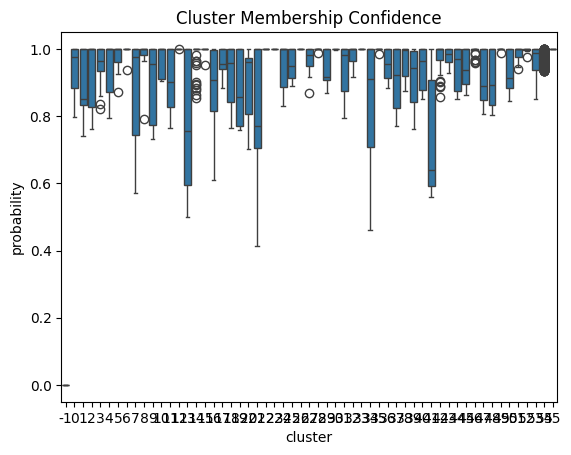

In [31]:
df['probability'] = clusterer.probabilities_
print(df.groupby('cluster')['probability'].mean())

sns.boxplot(x='cluster', y='probability', data=df)
plt.title("Cluster Membership Confidence")
plt.show()


In [32]:
df['cluster'].value_counts()

cluster
 54    18629
-1      2191
 14       70
 42       51
 4        31
 46       28
 39       25
 3        24
 24       24
 41       23
 45       22
 20       22
 19       19
 17       19
 16       18
 50       17
 48       17
 27       16
 44       15
 53       15
 18       15
 13       15
 0        15
 25       14
 11       14
 40       13
 21       13
 31       13
 47       13
 29       13
 34       13
 36       12
 1        12
 38       11
 37       11
 51       10
 43       10
 9        10
 7        10
 2         9
 32        9
 10        8
 30        7
 52        7
 8         7
 5         7
 35        6
 6         6
 12        6
 28        6
 15        6
 55        6
 49        6
 33        5
 26        5
 22        5
 23        5
Name: count, dtype: int64

In [33]:
mask = clusterer.labels_ != -1
score = silhouette_score(X_scaled[mask], clusterer.labels_[mask])
print("Silhouette Score (excluding noise):", score)


Silhouette Score (excluding noise): -0.23667622942419683
